In [407]:
#Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px 
import math 
import statistics as st
from collections import Counter
import scipy.stats as sp
import seaborn as sns 
import statsmodels.api as sm


In [408]:
url = 'https://raw.githubusercontent.com/md-lorente/data/master/datos_ventas.csv'
#Creacion Dataframe
df_ventas= pd.read_csv(url, sep = ';',decimal =',')
df_ventas.head()


Fecha_anual  Inversion  Ventas
0         1980        1.0    4.61
1         1981        1.5    5.18
2         1982        2.0    5.09
3         1983        2.5    5.44
4         1984        3.0    0.62

In [409]:
print(df_ventas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha_anual  38 non-null     int64  
 1   Inversion    38 non-null     float64
 2   Ventas       38 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.0 KB
None


# 1- An√°lisis de las variables 
---
**Primeramente identifico el tipo de variables, la clasificaci√≥n a la que corresponden las variables y identifico el tipo de variables que ser√≠an desde el punto de vista del an√°lisis de datos.**

**Fecha_anual:** variable que se refiere a la fecha, es decir, el a√±o en el que se produjo la inversi√≥n y la venta. 

Clasificaci√≥n de la variable estad√≠stica: es una variable que se recoge de manera num√©rica, es cuantitativa y continua en su naturaleza, puesto que puede tomar un n√∫mero de valores infinitos.

An√°lisis de datos: se recoge de manera num√©rica pero es categ√≥rica, ya que no tiene sentido sumar los a√±os. Se trata de una variable recogida o expresada de forma num√©rica cuyo uso es categ√≥rico y ordinal. Se utiliza para clasificar la informaci√≥n sobre el a√±o/fecha en la que ha ocurrido un suceso.

**Inversi√≥n y Ventas:** la inversi√≥n indica la cantidad de millones de ‚Ç¨ que la empresa ha invertido en un a√±o determinado. La variable ventas se refiere a las ventas que ha tenido la empresa en millones de ‚Ç¨ por un a√±o determinado. 

Clasificaci√≥n de la variable estad√≠stica: ambas son variables cuantitativas (se pueden cuantificar/medir) y continuas ya que tanto la inversi√≥n como las ventas estan en millones de ‚Ç¨, esto indica un valor en dinero que puede tomar un n√∫mero de valores infinitos.

An√°lisis de datos: ambas son variables anal√≠ticas, puesto que el dinero se representa en un n√∫mero que expresa una cantidad en millones de ‚Ç¨ espec√≠fica.

# 2- Ajustar un modelo de regresi√≥n lineal. Obtener una estimaci√≥n de los par√°metros del modelo y su interpretaci√≥n.
---


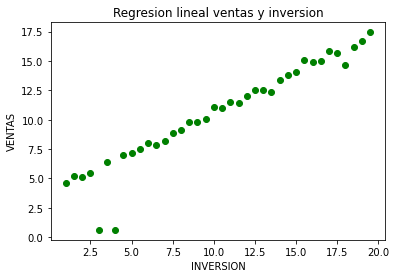

La covarianza es: 22.92993243243243


In [410]:
#Creacion del grafico de dispersion
plt.title("Regresion lineal ventas y inversion")
plt.xlabel("INVERSION")
plt.ylabel("VENTAS")

x = list(df_ventas['Inversion'].values)
y = list(df_ventas['Ventas'].values)
plt.scatter(x, y, c='green')
plt.show()

#Calculo de la covarianza 
covarianza = df_ventas.cov()["Inversion"]["Ventas"]
print("La covarianza es:" , covarianza)


**Conclusiones ejercicio 2**
---
Seg√∫n el an√°lisis de la existencia de relaciones o dependencias entre dos variables  Inversi√≥n(ùëã) y  Ventas(ùëå), pueden haber dos tipos de relaciones; funcional y aleatoria. La relaci√≥n entre las variables es **aleatoria**, aunque no exista 
entre las variables una relaci√≥n exacta, se puede observar una cierta tendencia entre los comportamientos de ambas. Por ejemplo, la tendencia que se observa de los datos es que a mayor inversi√≥n mayores ventas. 

Se obtiene un valor de **covarianza de 22.92**, valor positivo, lo cual indica que hay una **relaci√≥n directa** entre ambas variables. Esto tambi√©n confirma que a medida que aumentan las inversiones, hay una tendencia a que suban las ventas.

Las conclusiones obtenidas de los datos que se ven en el gr√°fico confirman que hay una dependencia positiva puesto que la l√≠nea es ascendente.

In [411]:
#Calculo del coeficiente correlacion de Pearson 
coef_pearson = df_ventas.corr(method="pearson")["Inversion"]["Ventas"]
print(coef_pearson)


0.9562823420491507


Para ver si las variables est√°n correladas, se halla el **coeficiente de correlaci√≥n lineal de Pearson** , el valor obtenido es **0.95**.

El resultado del coeficiente de correlaci√≥n lineal de Pearson est√° pr√≥ximo a 1 lo que implica que existe una relaci√≥n lineal muy fuerte entre las variables analizadas de inversi√≥n y ventas. 

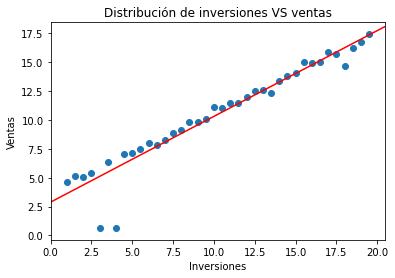

In [412]:
#Ajuste lineal
#Recta de Regresi√≥n Y sobre X
def recta(x):
    pendiente = df_ventas.cov()["Inversion"]["Ventas"]/df_ventas["Inversion"].var()
    return pendiente*(x-df_ventas["Inversion"].mean())+df_ventas["Ventas"].mean()

line = [recta(x) for x in np.arange(3000)]

#labels
plt.title("Distribuci√≥n de inversiones VS ventas")
plt.xlabel("Inversiones")
plt.ylabel("Ventas")

#limits
plt.xlim(df_ventas["Inversion"].min() - 1 , df_ventas["Inversion"].max() +1 )
plt.ylim(df_ventas["Ventas"].min() - 1 , df_ventas["Ventas"].max() +1 )

#Nube de puntos + recta de regresi√≥n
plt.scatter(df_ventas["Inversion"],df_ventas["Ventas"])
plt.plot(line, color='red')
plt.show()


**Recta de regresi√≥n Y sobre X**
---
Uno de los objetivos de esta recta de regresi√≥n es predecir el valor de las ventas (Y) conocido el valor de la inveris√≥n (X)


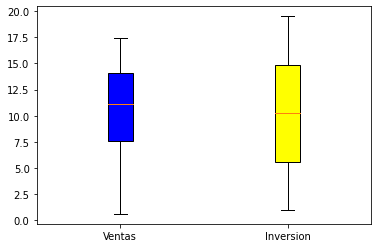

In [413]:
#Grafico de boxplot de las dos variables
fig,ax = plt.subplots()
box = ax.boxplot([df_ventas ['Ventas'] , df_ventas ['Inversion']] , patch_artist=True)
plt.xticks([1, 2], ["Ventas", "Inversion"])
colors = ['#0000FF', '#FFFF00']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

#print(df_ventas ['Ventas'])
#print(df_ventas ['Inversion'])


**Gr√°fico de Boxplot para comparar las 2 variables (Ventas & Inversiones)**

Interpretaci√≥n del gr√°fico:

Variable inversi√≥n: la **dispersi√≥n es alta** (imprimo lista de la variable) los valores de inversi√≥n van des de 1 mill√≥n de ‚Ç¨ hasta 19.5 millones ‚Ç¨.

Variable ventas: la **dispersi√≥n sigue siendo elevada**(valores des de 4.61 millones de ‚Ç¨ hasta 17.45 millones de ‚Ç¨) pero no lo es tanto como inversi√≥n.

Los outliers (observaciones) no se muestran como tal en el gr√°fico de boxplot. La raz√≥n por la que no aparecen es porque estos valores entran dentro del rango de aceptaci√≥n de la variable venta y de la variable inversi√≥n correspondientemente. No son muy at√≠picos comparados con el resto de ventas e inversiones.

Sin embargo, si se analiza el gr√°fico de dispersi√≥n se podr√≠an considerar como observaciones at√≠picas en relaci√≥n a la variable inversi√≥n, puesto que para un valor muy elevado de inversi√≥n se obtiene un n√∫mero muy bajo de ventas.

En estos dos gr√°ficos de boxplot no aparecen los outliers porque las variables estan separadas.En cambio en el gr√°fico de dispersi√≥n si que aparecen los outliers porque las dos variables estan relacionadas. 

# 3- ¬øCu√°ntas ventas se obtendr√≠an si se invirtiesen 7 millones de euros?
---
Como Pearson nos da un n√∫mero muy pr√≥ximo a 1 (0.95), se puede definir un modelo matem√°tico a trav√©s de la regresi√≥n lineal.





Con una inversi√≥n de 7 millones de ‚Ç¨ se obtendr√≠an 8.079217638691322 millones de ‚Ç¨ de ventas


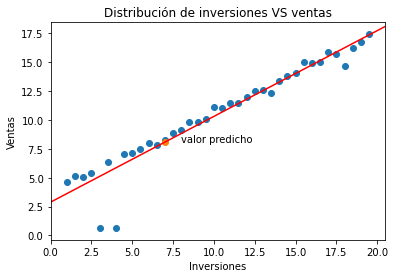

In [414]:
# Modelo matem√°tico
from scipy import stats as ss
pendiente, coeficiente, pearson, p, error = ss.linregress(df_ventas["Inversion"], df_ventas["Ventas"])

def Ventas(Inversion):
    return coeficiente + Inversion*pendiente

#prediccion de 8 millones de ventas para 7 millones de inversion 
valor_modelo = Ventas(7.0)
print("Con una inversi√≥n de 7 millones de ‚Ç¨ se obtendr√≠an" , valor_modelo , "millones de ‚Ç¨ de ventas")

#Grafica resultado 
def recta(x):
    pendiente = df_ventas.cov()["Inversion"]["Ventas"]/df_ventas["Inversion"].var()
    return pendiente*(x-df_ventas["Inversion"].mean())+df_ventas["Ventas"].mean()

line = [recta(x) for x in np.arange(3000)]

# labels
plt.title("Distribuci√≥n de inversiones VS ventas")
plt.xlabel("Inversiones")
plt.ylabel("Ventas")

# limits
plt.xlim(df_ventas["Inversion"].min() -1 , df_ventas["Inversion"].max() +1 )
plt.ylim(df_ventas["Ventas"].min() -1 , df_ventas["Ventas"].max() +1 )

# Nube de puntos + recta de regresi√≥n
plt.scatter(df_ventas["Inversion"],df_ventas["Ventas"])
plt.scatter(7,valor)
plt.annotate("valor predicho" , (8,valor))
plt.plot(line, color='red')
plt.show()


**Conclusiones ejercicio 3**
---
Se obtienen 8.079 millones de ‚Ç¨ en ventas si se invierten 7 millones de ‚Ç¨.

Con esta funci√≥n se define un modelo capaz de predecir las ventas a partir de las nuevas inversiones y la pendiente de la recta, asumiendo un error aleatorio.

# 4- Evaluar el modelo a trav√©s de la SCE y el coeficiente de determinaci√≥n.



In [415]:
#Calculo Minimos Cuadrados (SCE)

error_m = df_ventas['Ventas']- df_ventas['Inversion'].map(Ventas)

sce = sum(error_m**2)
print("El c√°lculo de SCE es:" , sce)

#Calculo del Error Cuadr√°tico Medio(MSE)
MSE= sce/n
print("El Error Cuadr√°tico Medio(MSE) es:" ,MSE)

#Ra√≠z del Error Cuadr√°tico Medio (RMSE)
RMSE = math.sqrt(MSE)
print("La Ra√≠z del Error Cuadr√°tico Medio (RMSE) es:" , RMSE)

#Calculo del Coeficiente de Determinacion
coef_determinacion = pearson**2
print("El Coeficiente de Determinaci√≥n es:" , coef_determinacion)

#Calculo Coeficiente Determinacion Ajustado
n = 38
k = 1
coef_determinacion_ajustado = 1 - (n-1)/(n-k-1) * (1-coef_determinacion)
print("El Coeficiente de Determinaci√≥n Ajustado es:" , coef_determinacion_ajustado) 

El c√°lculo de SCE es: 58.927288456067366
El Error Cuadr√°tico Medio(MSE) es: 1.5507181172649307
La Ra√≠z del Error Cuadr√°tico Medio (RMSE) es: 1.245278329236051
El Coeficiente de Determinaci√≥n es: 0.9144759177150085
El Coeficiente de Determinaci√≥n Ajustado es: 0.9121002487626476


**Conclusiones ejercicio 4**
---
Obtenemos un **SCE de 58.927,** este mide la Suma Cuadrado de los Errores donde el error es la distancia entre lo predicho y lo real. Representa un total de la suma de los errores al cuadrado para analizar que tan bien se ajustan o no a la l√≠nea de regresi√≥n.

En este caso el error se mide seg√∫n la diferencia entre las ventas reales y las ventas predichas por el modelo.

El SCE se utiliza cuando se tienen 2 modelos, se podr√≠a realizar una comparaci√≥n. El modelo que tenga un valor de SCE menor, ser√° el modelo m√°s preciso. Cuanto mayor sea el SCE, menor ser√° la precisi√≥n del modelo y por lo tanto menor predicci√≥n.

El c√°lculo del **Error Cuadr√°tico Medio (MSE)**
es el promedio de los errores al cuadrado, es decir que tan lejos est√° cada valor real del predicho en promedio.

Con el c√°lculo de la **Ra√≠z del Error Cuadr√°tico Medio (RMSE)** se obtiene la distancia promedio entre cada valor real y predicho. 

Ambos c√°lculos (MSE y RMSE) son utilizados para comparar dos modelos.

Se obtiene un valor de **0.914** para el **Coeficiente de Determinaci√≥n**, valor muy pr√≥ximo a 1, hay un buen ajuste (preciso pero no perfecto) entre entre la nube de puntos y la ecuaci√≥n estimada. Sin embargo puesto que el valor no alcanza 1, significa que no todos los residuos son nulos.

Tambi√©n se calcula el **Coeficiente de Determinaci√≥n Ajustado** el valor obtenido es **0.912**, un valor inferior a R-cuadrado normal. 

La diferencia entre ambos coeficientes es que R-cuadrado ajustado penaliza la inclusi√≥n de variables.

# 4.1- An√°lisis del error 
---
(link utilizado para el an√°lisis:https://www.colorado.edu/amath/sites/default/files/attached-files/ch12_0.pdf)


La estimaci√≥n de la varianza de los errores puntuales es: 1.636869123779649 la estimaci√≥n de la desviaci√≥n de los errores puntuales es: 1.279401861722754


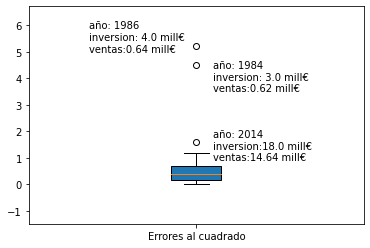

In [416]:
#Calculo varianza y desviacion de los errores 

varianza1 = sce/36
#36 corresponde a n-2
desviacion1 = math.sqrt(varianza1)
print("La estimaci√≥n de la varianza de los errores puntuales es:" , varianza1 , "la estimaci√≥n de la desviaci√≥n de los errores puntuales es:" , desviacion1)

#GRAFICO BOXPLOT 

fig,ax = plt.subplots()
error_absoluto = abs(error_m)
grafico = ax.boxplot([error_absoluto ] , patch_artist=True)
plt.xticks([1], ["Errores al cuadrado"])
plt.text(1.05,0.9,"a√±o: 2014\ninversion:18.0 mill‚Ç¨\nventas:14.64 mill‚Ç¨")
plt.text(1.05,3.5,"a√±o: 1984 \ninversion: 3.0 mill‚Ç¨ \nventas:0.62 mill‚Ç¨") 
plt.text(0.68,5,"a√±o: 1986 \ninversion: 4.0 mill‚Ç¨ \nventas:0.64 mill‚Ç¨") 
plt.ylim(error_absoluto.min() -1.5 , error_absoluto.max() +1.5 )
plt.show()

# Conclusiones del gr√°fico boxplot
---

Hay **poca dispersi√≥n** entre los datos, se observan los 2 outliers evidentes que tambi√©n se ven en el gr√°fico de dispersi√≥n. Otro aspecto a destacar es que se identifica otro posible outlier (a√±o 2014, inversi√≥n 18 millones de ‚Ç¨ y ventas 14.64 millones de ‚Ç¨).
Se puede ver que la mayor√≠a de los datos se concentran cerca del 0, con lo cual la mayor√≠a de los valores son cercanos a lo predicho por la regresi√≥n lineal. 

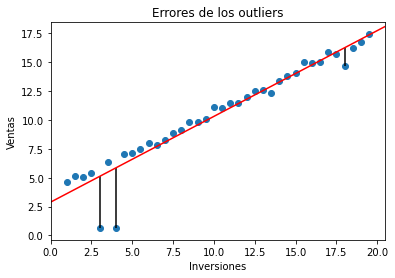

In [417]:
#Grafico lineas verticales outliers 
def recta(x):
    pendiente = df_ventas.cov()["Inversion"]["Ventas"]/df_ventas["Inversion"].var()
    return pendiente*(x-df_ventas["Inversion"].mean())+df_ventas["Ventas"].mean()

line = [recta(x) for x in np.arange(3000)]

plt.title("Errores de los outliers")
plt.xlabel("Inversiones")
plt.ylabel("Ventas")

plt.xlim(df_ventas["Inversion"].min() - 1 , df_ventas["Inversion"].max() +1 )
plt.ylim(df_ventas["Ventas"].min() - 1 , df_ventas["Ventas"].max() +1 )

# Nube de puntos + recta de regresi√≥n
plt.scatter(df_ventas["Inversion"],df_ventas["Ventas"])
plt.plot(line, color='red')
plt.vlines(x = 18.0 , ymin = 14.64 , ymax = recta(18.0))
plt.vlines(x = 3.0 , ymin = 0.62 , ymax = recta(3.0))
plt.vlines(x = 4.0 , ymin = 0.64 , ymax = recta(4.0))
plt.show()


En este gr√°fico se observa la distancia de los 2 outliers evidentes y el posible outlier respecto a la recta de regresi√≥n.

# 4.2- C√°lculo del error de regresi√≥n (SCR)
---


In [418]:
#Error de regresion (SCR)
promedio_ventas = df_ventas['Ventas'].mean()

def restar_promedio(Inversion):
  return Ventas(Inversion) - promedio_ventas 

error_regresion = df_ventas['Inversion'].map(restar_promedio)

scr = sum(error_regresion**2)
print("El Error de regresi√≥n es:" , scr)


El Error de regresi√≥n es: 630.08669312288


Este tipo de error tambi√©n se usa para 2 modelos, 
los cuales se comparan y se elige el que tiene un valor de error m√°s bajo.

Esta medida sirve para analizar si las variables que explican el modelo (variables explicativas), captan bien las variaciones de la variable que se pretende explicar (variable dependiente)."

# 5- Estudio a parte: an√°lisis de los outliers
---
link utilizado: https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(OpenStax)/12%3A_Linear_Regression_and_Correlation/12.07%3A_Outliers

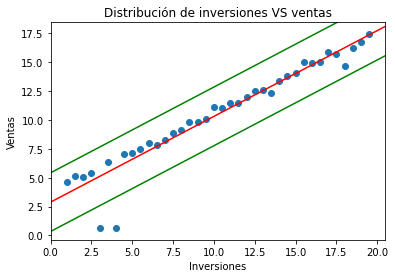

In [419]:
# Recta de Regresi√≥n Y sobre X
def recta(x):
    pendiente = df_ventas.cov()["Inversion"]["Ventas"]/df_ventas["Inversion"].var()
    return pendiente*(x-df_ventas["Inversion"].mean())+df_ventas["Ventas"].mean()

def recta_superior(x):
    pendiente = df_ventas.cov()["Inversion"]["Ventas"]/df_ventas["Inversion"].var()
    return pendiente*(x-df_ventas["Inversion"].mean())+df_ventas["Ventas"].mean() + 2.54

def recta_inferior(x):
    pendiente = df_ventas.cov()["Inversion"]["Ventas"]/df_ventas["Inversion"].var()
    return pendiente*(x-df_ventas["Inversion"].mean())+df_ventas["Ventas"].mean() - 2.54

line = [recta(x) for x in np.arange(3000)]
line_superior = [recta_superior(x) for x in np.arange(3000)]
line_inferior = [recta_inferior(x) for x in np.arange(3000)]

# labels
plt.title("Distribuci√≥n de inversiones VS ventas")
plt.xlabel("Inversiones")
plt.ylabel("Ventas")

# limits
plt.xlim(df_ventas["Inversion"].min() - 1 , df_ventas["Inversion"].max() +1 )
plt.ylim(df_ventas["Ventas"].min() - 1 , df_ventas["Ventas"].max() +1 )

# Nube de puntos + recta de regresi√≥n
plt.scatter(df_ventas["Inversion"],df_ventas["Ventas"])
plt.plot(line, color='red')
plt.plot(line_superior, color='green')
plt.plot(line_inferior, color='green')
plt.show()


# Conclusiones del gr√°fico
---
En la gr√°fica de dispersi√≥n se identifican los 2 outliers evidentes (a√±o 1984, inversi√≥n 3 millones de ‚Ç¨ y ventas 0.62 millones de ‚Ç¨ / a√±o 1986, inveris√≥n 4 millones de ‚Ç¨ y ventas 0.64 millones de ‚Ç¨). Este gr√°fico me ayuda a contrastar los datos que se observan en el gr√°fico de boxplot anterior (donde se ve un posible tercer outlier).

Haciendo referencia al art√≠culo, los valores que estan 2 desviaciones estandar por arriba o por abajo de la recta de regresi√≥n, se consideran outliers.

La estimaci√≥n de la desviaci√≥n de los errores puntuales es 1.27, por lo cual 2 desviaciones por arriba o por abajo corresponden al valor: 2.54.

Podemos concluir que **el tercer valor** (a pesar de estar un poco m√°s alejado del resto) **no es un outlier**. El art√≠culo afirma que todo lo que est√© 2 desviaciones por encima o por abajo son 
outliers potenciales, por lo tanto no consideramos esta tercera observaci√≥n como outlier. 
Sin embargo he creado el boxplot para contrastar.

In [420]:
df_nooutliers = df_ventas.drop(df_ventas[df_ventas['Ventas'] < 1].index).reset_index()
df_nooutliers.head()

index  Fecha_anual  Inversion  Ventas
0      0         1980        1.0    4.61
1      1         1981        1.5    5.18
2      2         1982        2.0    5.09
3      3         1983        2.5    5.44
4      5         1985        3.5    6.39

# 5.1 - Repeated median algorithm 


8.543897058823529


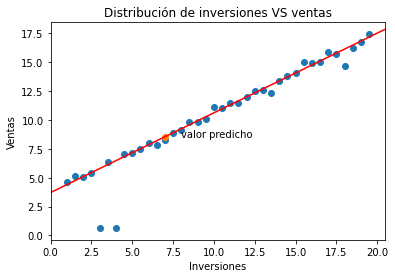

In [421]:
# Regresion robusta
from scipy import stats as ss
pendiente, coeficiente = ss.siegelslopes(df_ventas["Ventas"], df_ventas["Inversion"])

def Ventas(Inversion):
    return coeficiente + Inversion*pendiente

valor1 = Ventas(7.0)
print(valor1)

#Grafica resultado 
line = [Ventas(x) for x in np.arange(3000)]

# labels
plt.title("Distribuci√≥n de inversiones VS ventas")
plt.xlabel("Inversiones")
plt.ylabel("Ventas")

# limits
plt.xlim(df_ventas["Inversion"].min() -1 , df_ventas["Inversion"].max() +1 )
plt.ylim(df_ventas["Ventas"].min() -1 , df_ventas["Ventas"].max() +1 )

# Nube de puntos + recta de regresi√≥n
plt.scatter(df_ventas["Inversion"],df_ventas["Ventas"])
plt.scatter(7,valor1)
plt.annotate("valor predicho" , (8,valor1))
plt.plot(line, color='red')
plt.show()

Nos basamos en uno de los modelos de regresi√≥n robusta (repeated median algorithm), m√©todo robusto a los valores at√≠picos en la variable de respuesta (Ventas - Y).Este modelo baja el peso de los outliers en los c√°lculos.

# 5.2 - Calculo de coeficiente de determinaci√≥n y coeficiente de determinaci√≥n ajustado sin outliers 
---
Estudio a parte para quitar los outliers, estamos elimanando los 2 outliers del dataset asumiendo que son datos insignificativos para el estudio en contraposici√≥n con el estudio de antes, donde si asumimos que son significativos.
**Concluyo que en nuestro caso los outliers s√≠ son significativos y no se tienen que eliminar**. Sin embargo quer√≠a contrastar los valores obtenidos y ver los resultados con outliers y sin outliers. 

In [422]:
# Correlacion 
coef_pearson_nooutliers = df_nooutliers.corr(method="pearson")["Inversion"]["Ventas"]
print("El Coeficiente de Correlaci√≥n de Pearson sin outliers es:" , coef_pearson_nooutliers)

#Calculo coeficientes sin los outliers 
#Calculo del coeficiente de determinacion
coef_determinacion_nooutliers = coef_pearson_nooutliers**2
print("El Coeficiente de Determinaci√≥n sin outliers es:" , coef_determinacion_nooutliers)

#Calculo coeficiente determinacion ajustado
n = 38
k = 1
coef_determinacion_ajustado_no = 1 - (n-1)/(n-k-1) * (1-coef_determinacion_nooutliers)
print("El Coeficiente de Determinaci√≥n Ajustado sin outliers es:" , coef_determinacion_ajustado_no) 
#obtenemos un coef det ajustado menor que el coef determinacion

El Coeficiente de Correlaci√≥n de Pearson sin outliers es: 0.9953472185255251
El Coeficiente de Determinaci√≥n sin outliers es: 0.9907160854264995
El Coeficiente de Determinaci√≥n Ajustado sin outliers es: 0.9904581989105689


# 6- Calculo del p-valor
---


In [423]:
X = df_ventas['Inversion']
y = df_ventas['Ventas']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     384.9
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           8.25e-21
Time:                        22:02:07   Log-Likelihood:                -62.255
No. Observations:                  38   AIC:                             128.5
Df Residuals:                      36   BIC:                             131.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8805      0.440      6.546      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Se obtiene un p-valor tan peque√±o que se redondea a 0 (probablemente no es 0), esto indica que la hip√≥tesis nula no es cierta y hay correlaci√≥n entre 
las variables inversi√≥n y ventas, lo cual tiene sentido. 
En esta tabla tambi√©n podemos ver el valor de R2 que es 0.914, lo cual confirma que el c√°lculo es correcto. 


# 7- Conclusines finales 
---

Una vez analizado el dataset observo que hay una relaci√≥n aleatoria entre las variables X (Inversi√≥n) e Y (Ventas). Esto indica una tendencia de que a mayor inversi√≥n, mayor ser√°n las ventas (excepto 2 observaciones/outliers, que analizo).

La covarianza tiene un valor positivo de 22.92, lo cual implica que hay una relaci√≥n directa entre ambas variables. Adem√°s confirmo que hay una relaci√≥n lineal muy fuerte entre ambas variables con el c√°lculo del coeficiente de correlaci√≥n de Pearson (0.95).

Tambi√©n confirmo que uno de los objetivos de la recta de regresi√≥n es predecir el valor de las ventas (Y) conocido el valor de la inveris√≥n (X). 

Posteriormente, analizo las dos variables por separado con el gr√°fico de boxplot. Un aspecto a destacar es que los outliers no aparecen en el gr√°fico de boxplot (de cada variable) porque estos est√°n dentro del rango de aceptaci√≥n de la variable. En cambio en el gr√°fico de dispersi√≥n s√≠ que aparecen los outliers porque las dos variables est√°n relacionadas.

Despu√©s de este an√°lisis, defino un modelo matem√°tico a trav√©s de la regresi√≥n lineal para predecir las ventas (Y) en funci√≥n de las nuevas inversiones(X).

Obtengo un valor de SCE de 58.927, como s√≥lo tengo un modelo no lo puedo comparar, pero llego a la conclusi√≥n de que a mayor SCE menor predicci√≥n y a menor SCE mayor grado de predicci√≥n, puesto que la suma cuadrado de los errores es m√°s peque√±a.

Se calculan el Coeficiente de Determinaci√≥n (0.914) y el Coeficiente de Determinaci√≥n Ajustado (0.912), esto afirma que hay un buen ajuste entre la nube de puntos y la ecuaci√≥n estimada, ya que ambos valores son pr√≥ximos a 1.

Hago un an√°lisis m√°s extenso del error con un gr√°fico de boxplot, donde se identifica un potencial tercer outlier.

Realizo un estudio a parte para los outliers donde creo otro gr√°fico de dispersi√≥n m√°s espec√≠fico y descarto el tercer valor potencial (identificado previamente en el boxplot) como outlier.

Finalmente calculo el p-valor, obtengo un valor muy peque√±o que se redondea a 0, esto confirma que hay correlaci√≥n entre las variables X e Y. 